# German Legal Data Exploration

This notebook explores the sample German court decisions downloaded from www.rechtsprechung-im-internet.de.

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

Matplotlib is building the font cache; this may take a moment.


## Load Processed Data

In [2]:
# Path to processed data
processed_dir = "../data/german/processed"

# Load all JSON files
processed_docs = []
for filename in os.listdir(processed_dir):
    if filename.endswith('.json'):
        with open(os.path.join(processed_dir, filename), 'r', encoding='utf-8') as f:
            doc = json.load(f)
            processed_docs.append(doc)

print(f"Loaded {len(processed_docs)} processed documents")

Loaded 5 processed documents


## Analyze Metadata

In [3]:
# Extract metadata into a DataFrame
metadata_list = []
for doc in processed_docs:
    metadata = doc['metadata']
    metadata['text_length'] = len(doc['full_text'])
    metadata['num_sections'] = len(doc['sections'])
    metadata_list.append(metadata)

df = pd.DataFrame(metadata_list)
display(df.head())

,court,date,case_number,link,text_length,num_sections
0,BGH 9. Zivilsenat,20100114,IX ZB 72/08,http://www.rechtsprechung-im-internet.de/jport...,4687,2
1,BGH 2. Strafsenat,20100113,2 ARs 569/09,http://www.rechtsprechung-im-internet.de/jport...,1046,1
2,BGH 2. Strafsenat,20100113,2 StR 428/09,http://www.rechtsprechung-im-internet.de/jport...,10680,1
3,BGH 2. Strafsenat,20100113,2 StR 447/09,http://www.rechtsprechung-im-internet.de/jport...,3455,1
4,BGH 9. Zivilsenat,20100114,IX ZB 76/09,http://www.rechtsprechung-im-internet.de/jport...,4736,2


## Document Statistics

Text length statistics:
count        5.000000
mean      4920.800000
std       3550.346561
min       1046.000000
25%       3455.000000
50%       4687.000000
75%       4736.000000
max      10680.000000
Name: text_length, dtype: float64


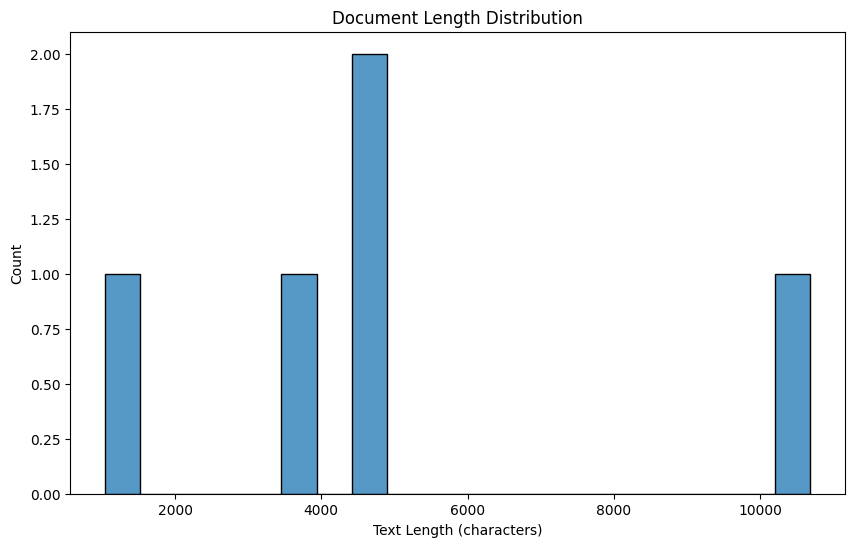

In [4]:
# Text length statistics
print("Text length statistics:")
print(df['text_length'].describe())

# Plot text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=20)
plt.title('Document Length Distribution')
plt.xlabel('Text Length (characters)')
plt.ylabel('Count')
plt.show()

## Document Sections

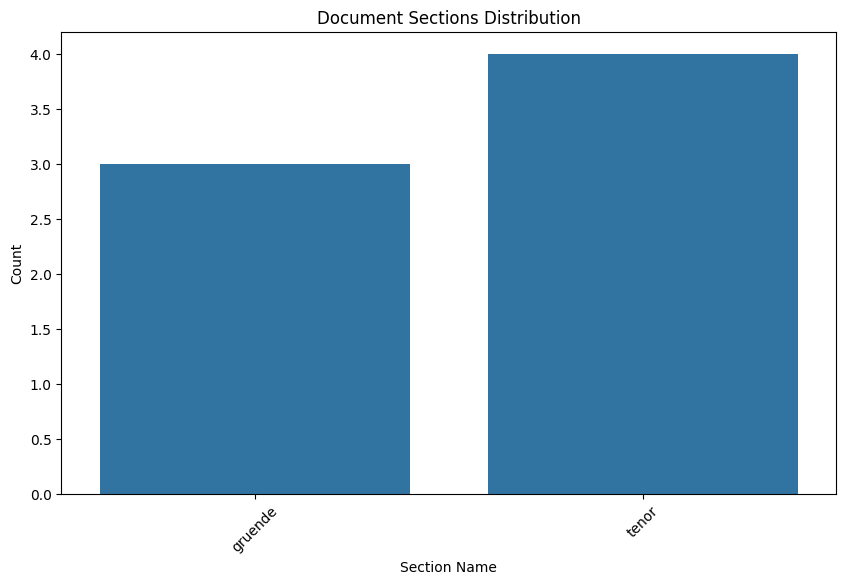

In [5]:
# Count which sections are present
section_counts = {}
for doc in processed_docs:
    for section_name in doc['sections']:
        section_counts[section_name] = section_counts.get(section_name, 0) + 1

# Plot section distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(section_counts.keys()), y=list(section_counts.values()))
plt.title('Document Sections Distribution')
plt.xlabel('Section Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Explore Formatted Examples

In [6]:
# Load all JSONL files
formatted_examples = []
all_examples_path = os.path.join(processed_dir, 'all_examples.jsonl')

if os.path.exists(all_examples_path):
    with open(all_examples_path, 'r', encoding='utf-8') as f:
        for line in f:
            example = json.loads(line)
            formatted_examples.append(example)

print(f"Loaded {len(formatted_examples)} formatted examples")

Loaded 20 formatted examples


In [7]:
# Group examples by task
task_examples = {}
for example in formatted_examples:
    task = example['metadata']['task']
    if task not in task_examples:
        task_examples[task] = []
    task_examples[task].append(example)

# Print count by task
for task, examples in task_examples.items():
    print(f"{task}: {len(examples)} examples")

classification: 5 examples
summarization: 5 examples
case_analysis: 5 examples
statute_interpretation: 5 examples


## Display Sample Formatted Example

In [8]:
# Display a sample example for case analysis
if 'case_analysis' in task_examples and task_examples['case_analysis']:
    sample = task_examples['case_analysis'][0]
    
    print("Sample Case Analysis Example:")
    print("\nSystem Message:")
    print(sample['conversations'][0]['content'])
    
    print("\nUser Instruction (truncated):")
    user_content = sample['conversations'][1]['content']
    print(user_content[:500] + "...")
    
    print("\nAssistant Response Template:")
    print(sample['conversations'][2]['content'])
    
    print("\nMetadata:")
    for key, value in sample['metadata'].items():
        print(f"{key}: {value}")

Sample Case Analysis Example:

System Message:
Du bist ein juristischer Assistent, der auf die Analyse deutscher Rechtsdokumente spezialisiert ist.

User Instruction (truncated):
Analysiere den folgenden Rechtsfall und erläutere die rechtlichen Grundlagen der Entscheidung.

JURE100055033 BGH 9. Zivilsenat 20100114 IX ZB 72/08 Beschluss § 4 InsO, § 13 ZPO, § 251 ZPO vorgehend LG Aachen, 17. März 2008, Az: 6 T 104/07, Beschluss vorgehend AG Aachen, 13. Februar 2007, Az: 92 IN 9/07 DEU Bundesrepublik Deutschland Insolvenzverfahren: Anwendbarkeit der Vorschrift über das Ruhen des Verfahrens; Beschwerderecht des Insolvenzverwalters im Zusammenhang mit der Verfahrenseröffnung ...

Assistant Response Template:
Analyse:
{analysis}

Rechtliche Grundlagen:
{legal_basis}

Schlussfolgerung:
{conclusion}

Metadata:
document_type: unknown
court: BGH 9. Zivilsenat
date: 20100114
case_number: IX ZB 72/08
language: de
task: case_analysis
source: rechtsprechung-im-internet


## Conclusion

This notebook has explored the sample German court decisions downloaded from www.rechtsprechung-im-internet.de and formatted for the Qwen2.5-7B-Instruct model. The data is now ready for fine-tuning the Legal Reasoning Model.